In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from RAVEN.pe.mac_taylor_utils import *
import matplotlib.pyplot as plt

# test MAC_Taylor

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

a = torch.arange(0, 1, 0.001).to(device)

precise = torch.exp(a).to(device)

point = 0.5
scale = torch.exp(torch.tensor([point])).to(device)
var = a - point

coeff = [1/1, 1/1, 1/2, 1/6, 1/24, 1/120, 1/720, 1/5040, 1/40320, 1/362880]

coeff = coeff[0:8]
print(coeff)

approximate = MAC_Taylor(scale, 
                         coeff, 
                         var, 
                         fxp=True, 
                         intwidth=7, 
                         fracwidth=8, 
                         rounding_coeff="round", 
                         rounding_var="floor", 
                         keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.001388888888888889, 0.0001984126984126984]
min error rate: tensor(-0.0118)
max error rate: tensor(-0.0001)
avg error rate: tensor(-0.0053)
rms error rate: tensor(0.0056)


# point search test

## flp

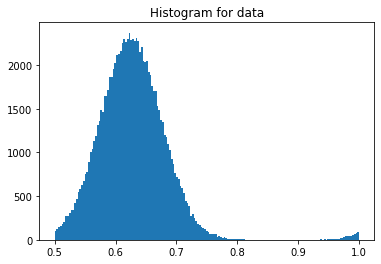

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000', '256.0000000000']
min error: ['-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '-0.0000000619', '-1.0000000000', '-0.0000000652']
max error: ['0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000']
avg error: ['-0.0785015374', '0.0288531855', '-0.0134643624', '0.0082376814', '-0.0062851035', '0.0054637352', '-0.0050589927', '0.0048180311']
rms error: ['0.1160360426', '0.0792786628', '0.0711266473', '0.0681646913', '0.0662197918', '0.0645684525', '0.0630637780', '0.0616658740']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599999547', '-0

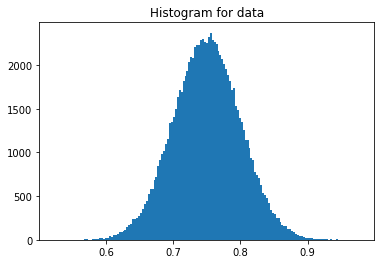

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000', '256.0000000000']
min error: ['-0.9084472656', '0.0001030201', '-0.8252764344', '0.0000002496', '-0.7497199774', '0.0000000000', '-0.6810812950', '-0.0000000647']
max error: ['-0.0021972423', '0.8658637404', '-0.0000048047', '0.7865915298', '0.0000000000', '0.7145769000', '0.0000000000', '0.6491553187']
avg error: ['-0.2597039640', '0.1397106647', '-0.0775533840', '0.0443024114', '-0.0259861592', '0.0156216398', '-0.0096090138', '0.0060393242']
rms error: ['0.2784840763', '0.1612022221', '0.0980255753', '0.0622387603', '0.0410692133', '0.0280625410', '0.0197988208', '0.0143891592']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3164062500', '-0.

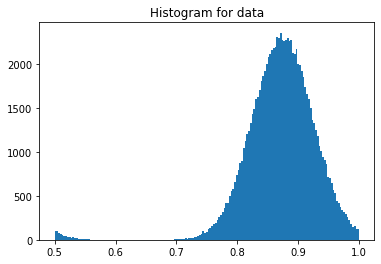

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000', '256.0000000000']
min error: ['-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '-0.0000000619', '-1.0000000000', '-0.0000000652']
max error: ['0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000']
avg error: ['-0.5650179386', '0.4366266429', '-0.3424866796', '0.2724429369', '-0.2196082920', '0.1792363375', '-0.1480088234', '0.1235744879']
rms error: ['0.5852235556', '0.4686238170', '0.3847191334', '0.3228715360', '0.2762790024', '0.2404746711', '0.2124550939', '0.1901574284']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599999547', '-0

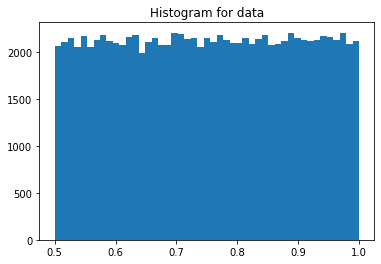

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000', '256.0000000000']
min error: ['-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '-0.0000000619', '-1.0000000000', '-0.0000000652']
max error: ['0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000']
avg error: ['-0.3346701562', '0.2511716485', '-0.2010146081', '0.1675463170', '-0.1436221600', '0.1256670207', '-0.1116938069', '0.1005096659']
rms error: ['0.4483465254', '0.3789751530', '0.3342062235', '0.3022502959', '0.2779663503', '0.2587058544', '0.2429468185', '0.2297433764']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599999547', '-0.007

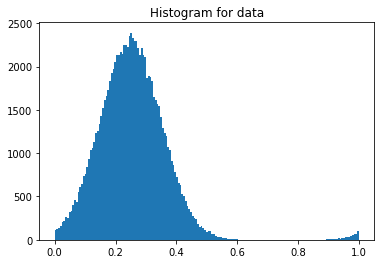

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001738', '0.0000001738']
avg error: ['-0.0308255013', '-0.0034112032', '-0.0003460097', '-0.0000360449', '-0.0000040167', '-0.0000004608', '-0.0000000578', '-0.0000000142']
rms error: ['0.0400108024', '0.0070224693', '0.0013668680', '0.0002474097', '0.0000388704', '0.0000053055', '0.0000006400', '0.0000000972']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

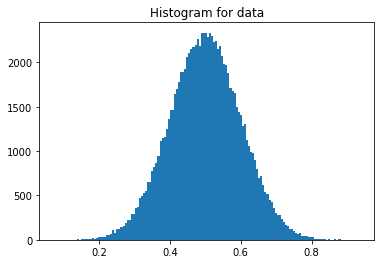

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2398301810', '-0.0685010329', '-0.0151837505', '-0.0027395838', '-0.0004159803', '-0.0000544580', '-0.0000062800', '-0.0000006561']
max error: ['-0.0026216158', '-0.0000644170', '-0.0000011068', '0.0000001107', '0.0000001107', '0.0000001107', '0.0000001738', '0.0000001738']
avg error: ['-0.0917057097', '-0.0155052766', '-0.0020653505', '-0.0002286398', '-0.0000217860', '-0.0000018336', '-0.0000001441', '-0.0000000192']
rms error: ['0.0964798927', '0.0173490215', '0.0025041155', '0.0003049975', '0.0000323773', '0.0000030650', '0.0000002731', '0.0000000728']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1501224935', '-0.032175

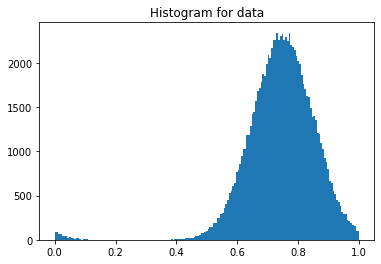

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001738', '0.0000001738']
avg error: ['-0.1722564399', '-0.0410673767', '-0.0076553845', '-0.0011737830', '-0.0001531972', '-0.0000174395', '-0.0000017644', '-0.0000001617']
rms error: ['0.1761251092', '0.0431440324', '0.0083504356', '0.0013410543', '0.0001846205', '0.0000222876', '0.0000023970', '0.0000002418']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

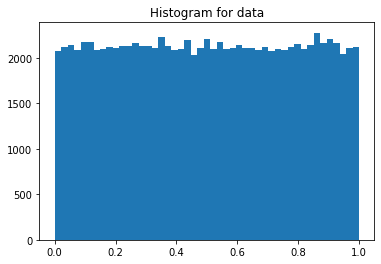

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001738', '0.0000001738']
avg error: ['-0.1037438810', '-0.0233702920', '-0.0043566944', '-0.0006903762', '-0.0000949514', '-0.0000115214', '-0.0000012512', '-0.0000001248']
rms error: ['0.1321612149', '0.0334472582', '0.0068826126', '0.0011868799', '0.0001756780', '0.0000227381', '0.0000026073', '0.0000002706']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

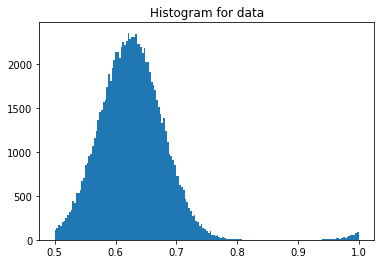

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618820190', '-0.0000000921', '-15.9861564636', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638847351', '0.0000000910', '14.0089483261']
avg error: ['-0.2486516535', '0.1247715950', '-0.0820040628', '0.0611719713', '-0.0487455539', '0.0403964035', '-0.0343609042', '0.0297814608']
rms error: ['2.9734780788', '1.8495844603', '1.3269910812', '1.0276478529', '0.8344420791', '0.6997168064', '0.6005509496', '0.5245828032']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228

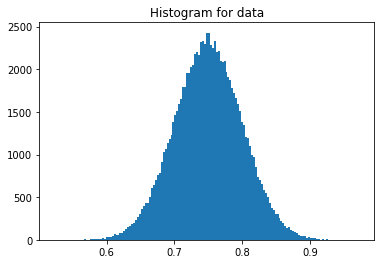

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-8.6964683533', '0.0000294916', '-3.5058634281', '0.0000000910', '-1.9851789474', '-0.0000000000', '-1.2850871086', '-0.0000001074']
max error: ['-0.0011356069', '5.1451435089', '-0.0000008192', '2.5768754482', '0.0000000910', '1.5789260864', '0.0000000910', '1.0642986298']
avg error: ['-0.3754407763', '0.1337098777', '-0.0560692549', '0.0259920433', '-0.0129407300', '0.0068101422', '-0.0037508472', '0.0021477768']
rms error: ['0.4479062259', '0.1785550565', '0.0856282488', '0.0462765880', '0.0273417160', '0.0173578281', '0.0117023792', '0.0083009182']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 5.3

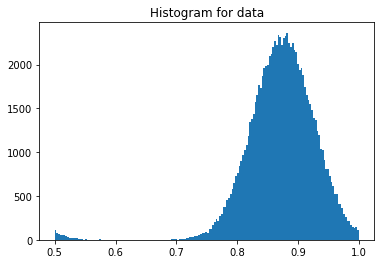

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618820190', '-0.0000000921', '-15.9861564636', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638847351', '0.0000000910', '14.0089483261']
avg error: ['-2.1334214211', '1.1274800301', '-0.6951715946', '0.4684477150', '-0.3349821866', '0.2501557469', '-0.1931723356', '0.1532323360']
rms error: ['4.4874796867', '2.7034752369', '1.8913195133', '1.4357368946', '1.1472412348', '0.9494441748', '0.8060040474', '0.6975470185']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228

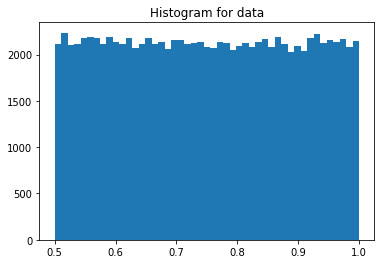

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618820190', '-0.0000000921', '-15.9861564636', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638847351', '0.0000000910', '14.0089483261']
avg error: ['-2.4609973431', '1.4218372107', '-0.9618004560', '0.7093768716', '-0.5525132418', '0.4467712343', '-0.3712846637', '0.3150511384']
rms error: ['8.6332664490', '5.3452110291', '3.8194131851', '2.9476952553', '2.3865010738', '1.9961175919', '1.7094205618', '1.4902529716']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.83479222857

In [2]:
intwidth = 7
fracwidth = 8
point_search(func="div", fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="exp", fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="log", fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## fxp

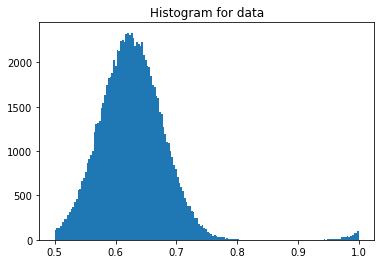

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0156250075', '-1.0000000000', '-0.0156250075', '-1.0000000000', '-0.0156250075', '-0.0156250075']
max error: ['0.0000000000', '1.0000000000', '0.0156249851', '1.0000000000', '0.0156249851', '1.0000000000', '0.0546874441']
avg error: ['-0.0798999965', '0.0208087396', '-0.0070388424', '0.0076278369', '-0.0054295459', '0.0074533834', '0.0018215850']
rms error: ['0.1199888214', '0.0812229812', '0.0772428289', '0.0762341544', '0.0757479146', '0.0755709559', '0.0153775457']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000']
min error: ['-0.3750000000', '-0.0156250075', '-0.1250000000', '-0.0156250298', '-0.0156250298']
max error: ['0.0156249851', '0.2500000000', '0.0156249851', '0.06250

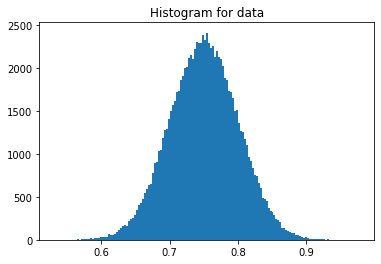

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0156250075', '-1.0000000000', '-0.0156250075', '-1.0000000000', '-0.0156250075', '-0.0156250447']
max error: ['-0.0156250075', '1.0000000000', '0.0156249851', '1.0000000000', '0.0156249851', '1.0000000000', '0.0546874441']
avg error: ['-0.2611932755', '0.1307546645', '-0.0743714944', '0.0479298718', '-0.0235993993', '0.0206546243', '0.0155361816']
rms error: ['0.2824384272', '0.1562118828', '0.1002086326', '0.0769672394', '0.0398415029', '0.0366908349', '0.0237310138']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000']
min error: ['-0.3750000000', '-0.0156250075', '-0.1250000000', '-0.0156250298', '-0.0156250447']
max error: ['0.0156249851', '0.2500000000', '0.0156249851', '0.062500

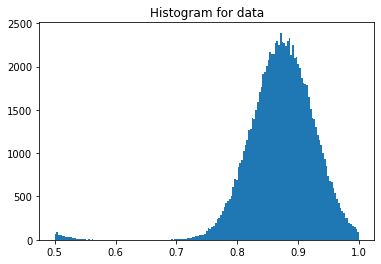

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0156250075', '-1.0000000000', '-0.0156250075', '-1.0000000000', '-0.0156250075', '-0.0156250447']
max error: ['0.0000000000', '1.0000000000', '0.0156249851', '1.0000000000', '0.0156249851', '1.0000000000', '0.0546874441']
avg error: ['-0.5685198307', '0.4289095104', '-0.3592433631', '0.2976103723', '-0.2293304652', '0.1946436614', '0.0103061255']
rms error: ['0.5909875631', '0.4653657377', '0.4079974890', '0.3511749804', '0.3037706316', '0.2707265019', '0.0302635413']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000']
min error: ['-0.3750000000', '-0.0156250075', '-0.1250000000', '-0.0156250298', '-0.0156250447']
max error: ['0.0156249851', '0.2500000000', '0.0156249851', '0.06250

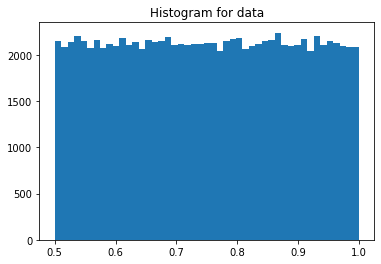

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0156250075', '-1.0000000000', '-0.0156250075', '-1.0000000000', '-0.0156250075', '-0.0156250447']
max error: ['0.0000000000', '1.0000000000', '0.0156249851', '1.0000000000', '0.0156249851', '1.0000000000', '0.0546874441']
avg error: ['-0.3354614079', '0.2415646762', '-0.2048920244', '0.1764614731', '-0.1509957761', '0.1352833509', '0.0092348168']
rms error: ['0.4522081912', '0.3785194457', '0.3502791226', '0.3254593611', '0.3059727252', '0.2915120423', '0.0252095349']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000']
min error: ['-0.3750000000', '-0.0156250075', '-0.1250000000', '-0.0156250298', '-0.0156250447']
max error: ['0.0156249851', '0.2500000000', '0.0156249851', '0.062500000

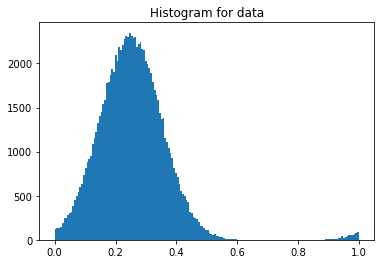

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0264989417', '-0.0264989417']
max error: ['0.0000000000', '0.0088257631', '0.0161011964', '0.0161011964']
avg error: ['-0.0310991127', '-0.0110205030', '-0.0105499802', '-0.0104067530']
rms error: ['0.0407512560', '0.0171870198', '0.0160446055', '0.0160124991']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000']
min error: ['-0.1492787600', '-0.0343164392']
max error: ['0.0362863690', '0.0370901935']
avg error: ['0.0158757512', '0.0167623404']
rms error: ['0.0255145393', '0.0228503011']

gaussian data mu= 0.25 Taylor expansion point= 0.5
eff coeff: ['1.0000000000', '1.0000000000']
min error: ['-0.1875000000', '-0.0397545137']
max error: ['-0.0028800881', '0.0568396635']
avg error: ['-0.0523731709', '-0.0086094337']
rms error: ['0.0637742579', '0.0313226432']

gaussian

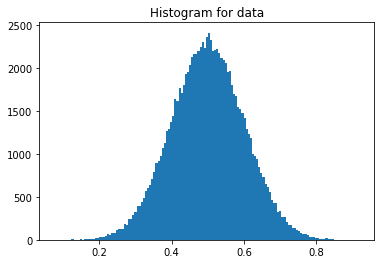

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.2412641346', '-0.0699366853', '-0.0264989417', '-0.0264989417']
max error: ['-0.0018736505', '0.0088257631', '0.0161011964', '0.0161011964']
avg error: ['-0.0917828903', '-0.0163669754', '-0.0030522321', '-0.0030514977']
rms error: ['0.0967206880', '0.0238587297', '0.0099305362', '0.0099298889']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000']
min error: ['-0.1433627307', '-0.0293028653', '-0.0143876467']
max error: ['0.0362863690', '0.0370901935', '0.0370901935']
avg error: ['-0.0050603040', '0.0111372666', '0.0112605439']
rms error: ['0.0222881064', '0.0216562506', '0.0216489676']

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['1.0000000000', '1.0000000000']
min error: ['-0.1193002835', '-0.0552669317']
max error: ['-0.0028800881', '0.0568396635']
avg error: ['-0.019

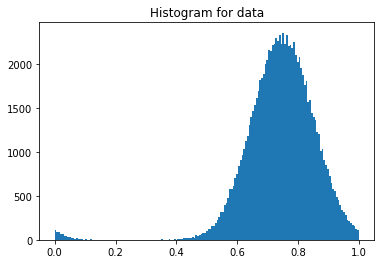

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0209859814', '-0.0155279497']
max error: ['0.0000000000', '0.0088257631', '0.0161011964', '0.0161011964']
avg error: ['-0.1720371842', '-0.0465131812', '0.0027151241', '0.0039876164']
rms error: ['0.1761100739', '0.0492198691', '0.0080925757', '0.0068268310']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000']
min error: ['-0.1492787600', '-0.0343164392']
max error: ['0.0362863690', '0.0370901935']
avg error: ['-0.0667596757', '0.0030164625']
rms error: ['0.0746360794', '0.0231076498']

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['1.0000000000', '1.0000000000']
min error: ['-0.1875000000', '-0.0552669317']
max error: ['-0.0028800881', '0.0568396635']
avg error: ['-0.0473536886', '-0.0269195307']
rms error: ['0.0525029562', '0.0339076854']

gaussian 

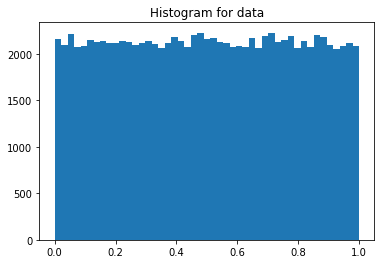

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0264989417', '-0.0264989417']
max error: ['0.0000000000', '0.0088257631', '0.0161011964', '0.0161011964']
avg error: ['-0.1035683006', '-0.0274898522', '-0.0040033511', '-0.0017991754']
rms error: ['0.1320309490', '0.0376298837', '0.0119727142', '0.0108348653']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000']
min error: ['-0.1492787600', '-0.0343164392']
max error: ['0.0362863690', '0.0370901935']
avg error: ['-0.0299370922', '0.0065500964']
rms error: ['0.0621470883', '0.0211432613']

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['1.0000000000', '1.0000000000']
min error: ['-0.1875000000', '-0.0552669317']
max error: ['-0.0028800881', '0.0568396635']
avg error: ['-0.0562391207', '-0.0127480878']
rms error: ['0.0705215558', '0.0304358993']

gaussian d

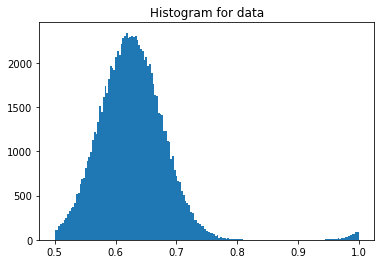

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667']
min error: ['-3.9052417278', '-0.0223583132', '-1.0000000000', '-0.0638905317', '-1.0000000000', '-0.0638905317', '-0.0969920456']
max error: ['-0.0081471624', '1.9052414894', '0.0008181266', '0.9368277192', '0.0862686560', '0.2040106058', '0.0862686560']
avg error: ['-0.0792470649', '0.0275902785', '-0.0436263755', '0.0216939356', '0.0099460278', '0.0158350319', '0.0158049315']
rms error: ['0.3130500317', '0.1544202268', '0.0908472911', '0.0846400037', '0.0888872594', '0.0431301072', '0.0430927500']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 5.36870912, 1.0]
gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['0

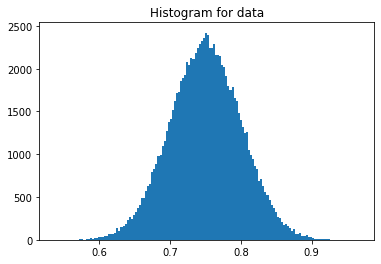

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667']
min error: ['-3.9052417278', '-0.0223583132', '-1.0000000000', '-0.0638905317', '-1.0000000000', '-0.0638905317', '-0.0969920456']
max error: ['-0.0081471624', '1.9052414894', '0.0008181266', '0.9368277192', '0.0862686560', '0.2040106058', '0.0862686560']
avg error: ['-0.2890411317', '0.0663353875', '-0.0714230463', '0.0607635975', '0.0304929577', '0.0607054904', '0.0305510629']
rms error: ['0.3491360843', '0.1105478853', '0.0996977985', '0.0871712640', '0.0661746562', '0.0868690386', '0.0657202005']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 5.36870912, 1.0]
gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['0.4

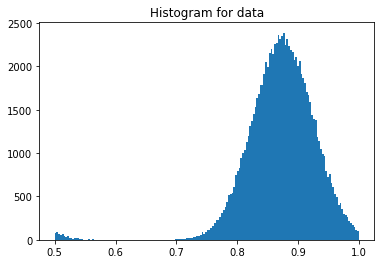

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667']
min error: ['-3.9052417278', '-0.0223583132', '-1.0000000000', '-0.0638905317', '-1.0000000000', '-0.0638905317', '-0.0969920456']
max error: ['-0.0081471624', '1.9052414894', '0.0008181266', '0.9368277192', '0.0862686560', '0.2040106058', '0.0862686560']
avg error: ['-1.2815866470', '0.6238569617', '-0.3612616956', '0.1577927023', '-0.1552619189', '0.0605930053', '-0.0580622144']
rms error: ['1.6077207327', '0.8253821731', '0.4661346376', '0.3268696964', '0.3262302279', '0.1373120397', '0.0784619823']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 5.36870912, 1.0]
gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: [

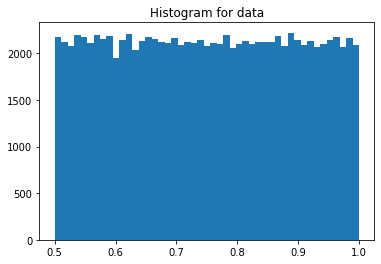

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667']
min error: ['-3.9052417278', '-0.0223583132', '-1.0000000000', '-0.0638905317', '-1.0000000000', '-0.0638905317', '-0.0969920456']
max error: ['-0.0081471624', '1.9052414894', '0.0008181266', '0.9368277192', '0.0862686560', '0.2040106058', '0.0862686560']
avg error: ['-0.8350840211', '0.3873842061', '-0.2320750505', '0.1495547146', '-0.1301541924', '0.0285610911', '-0.0091605596']
rms error: ['1.5016012192', '0.7451132536', '0.4052528739', '0.3418768942', '0.3579522371', '0.0857402384', '0.0575714447']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 5.36870912, 1.0]
gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4

In [3]:
intwidth = 7
fracwidth = 4
point_search(func="div", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="exp", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="log", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

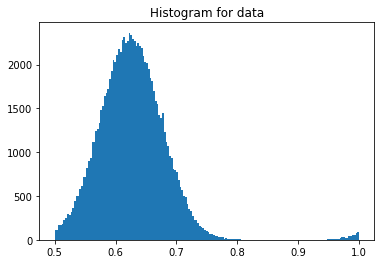

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0009765923', '-1.0000000000', '-0.0010223617', '-1.0000000000', '-0.0010223617', '-0.0010986701']
max error: ['0.0000000000', '1.0000000000', '0.0005035149', '1.0000000000', '0.0010376163', '1.0000000000', '0.0253905710']
avg error: ['-0.0775965974', '0.0280944277', '-0.0128490049', '0.0077315201', '-0.0058693429', '0.0052528703', '0.0001881517']
rms error: ['0.1138380617', '0.0767462701', '0.0687108040', '0.0658223554', '0.0640407503', '0.0624324493', '0.0012869048']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3593750000', '-0.0079345666', '-0.1289062500', '-0.0011291318', '-0.0468750000', '-0.0013427576', 

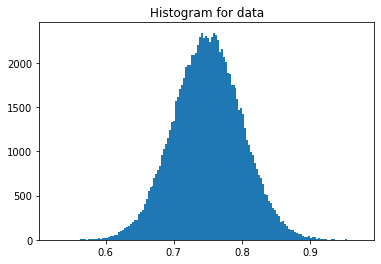

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-0.8936157227', '-0.0002441462', '-0.7986297607', '-0.0006408580', '-0.7150421143', '-0.0010223538', '-0.0010986701']
max error: ['-0.0021972423', '0.8465271592', '0.0004425365', '0.7553406358', '0.0010375986', '0.6755524278', '0.0253905710']
avg error: ['-0.2604603767', '0.1402221471', '-0.0779908076', '0.0445716046', '-0.0263811573', '0.0158554334', '0.0028789595']
rms error: ['0.2794272900', '0.1620550454', '0.0989389792', '0.0631119311', '0.0421550646', '0.0289519206', '0.0045069791']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3085021675', '-0.0042419201', '-0.0957336053', '-0.0010986701', '-0.0311431531', '-0.0013427576', '

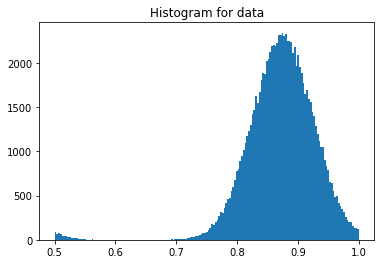

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0009765923', '-1.0000000000', '-0.0010223617', '-1.0000000000', '-0.0010223617', '-0.0010223617']
max error: ['0.0000000000', '1.0000000000', '0.0005035149', '1.0000000000', '0.0010376163', '1.0000000000', '0.0253905710']
avg error: ['-0.5658515692', '0.4372913837', '-0.3434107602', '0.2730299830', '-0.2204188555', '0.1799282730', '0.0155683113']
rms error: ['0.5859082937', '0.4692265093', '0.3856288791', '0.3234774768', '0.2769353092', '0.2411441803', '0.0168704428']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3593750000', '-0.0079345666', '-0.1289062500', '-0.0011291318', '-0.0468750000', '-0.0013427576', 

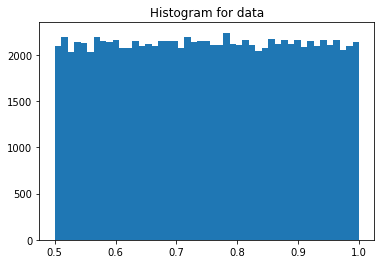

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0009765923', '-1.0000000000', '-0.0010223617', '-1.0000000000', '-0.0010223617', '-0.0010986701']
max error: ['0.0000000000', '1.0000000000', '0.0005035149', '1.0000000000', '0.0010376163', '1.0000000000', '0.0253905710']
avg error: ['-0.3329964876', '0.2493962497', '-0.1994775385', '0.1660004258', '-0.1423793435', '0.1245002896', '0.0069042477']
rms error: ['0.4466243684', '0.3771290481', '0.3326086998', '0.3006315529', '0.2766062319', '0.2574316561', '0.0111088613']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3593750000', '-0.0079345666', '-0.1289062500', '-0.0011291318', '-0.0468750000', '-0.0013427576', '-0.

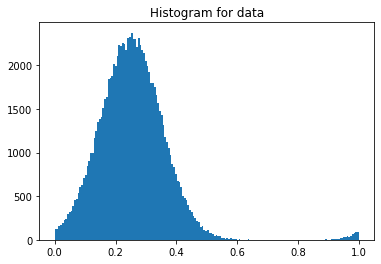

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.0310000777', '-0.0034748968', '-0.0004000268', '-0.0000369247', '-0.0000195515']
rms error: ['0.0403448865', '0.0072276685', '0.0016633992', '0.0009344428', '0.0009120281']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698', '-0.0025743698']
max error: ['0.0021472657', '0.0077213040', '0.0043279962', '0.0045673698', '0.0043279962']
avg error: ['-0.0048577422', '0.0004666813', '0.0005754813', '0.0006741194', '0.0006161919']
rms error: ['0.0146875195', '0.0031930972', '0.00148

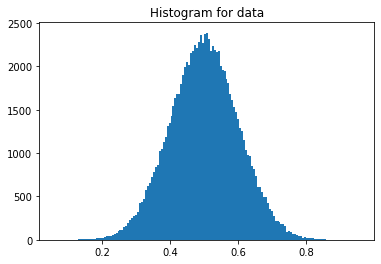

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2470032424', '-0.0723080039', '-0.0165862422', '-0.0031442123', '-0.0021743155']
max error: ['-0.0018736505', '0.0011735610', '0.0017781437', '0.0018073127', '0.0018073127']
avg error: ['-0.0917737186', '-0.0156009346', '-0.0019294252', '-0.0000851654', '0.0000498438']
rms error: ['0.0965361819', '0.0174603499', '0.0024759970', '0.0008509009', '0.0008458535']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000']
min error: ['-0.1566436440', '-0.0346581638', '-0.0045382944']
max error: ['0.0021472657', '0.0045673698', '0.0035366637']
avg error: ['-0.0285291988', '-0.0020553784', '0.0006543364']
rms error: ['0.0344284326', '0.0037143996', '0.0014102346']

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.166666666

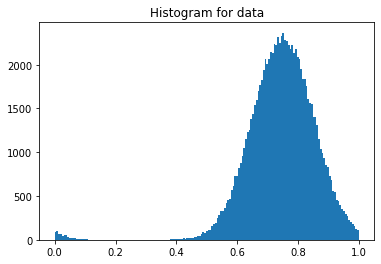

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0015456392', '0.0018073127', '0.0022234549']
avg error: ['-0.1723381281', '-0.0410845987', '-0.0074603390', '-0.0009832573', '-0.0003515191']
rms error: ['0.1762777716', '0.0431815274', '0.0082021644', '0.0013861604', '0.0008632772']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0020610872']
max error: ['-0.0000114194', '0.0077213040', '0.0043279962', '0.0043279962']
avg error: ['-0.0900591761', '-0.0145176966', '-0.0010784041', '0.0007953163']
rms error: ['0.0948288813', '0.0164422747', '0.0019347328', '0.0012448208']

gaussian data mu= 0.75 Taylor expansi

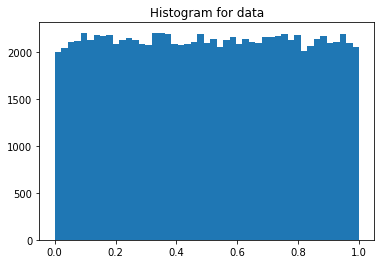

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.1035929695', '-0.0233474001', '-0.0042587854', '-0.0005872673', '-0.0001642664']
rms error: ['0.1319565326', '0.0333602242', '0.0067585381', '0.0013149019', '0.0009065098']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698', '-0.0025743698']
max error: ['0.0021472657', '0.0077213040', '0.0043279962', '0.0045673698', '0.0043279962']
avg error: ['-0.0510101654', '-0.0075253192', '-0.0003607275', '0.0007649283', '0.0007998912']
rms error: ['0.0727873668', '0.0138515495', '0.00217

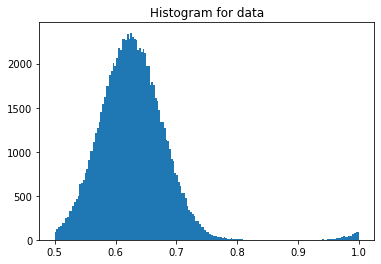

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-0.2746843696', '0.1374017596', '-0.0918016955', '0.0691530406', '-0.0543880388', '0.0443087593', '-0.0391900353', '0.0332134478']
rms error: ['3.2163660526', '1.9747065306', '1.4318414927', '1.1026721001', '0.8937083483', '0.7315580249', '0.6487972736', '0.5632892847']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.8347922285

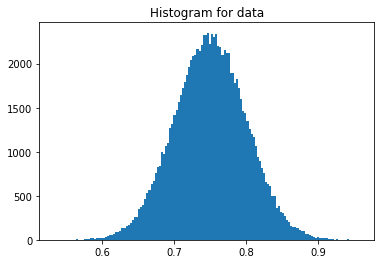

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-5.4750518799', '-0.0021754056', '-2.0577394962', '-0.0033870686', '-1.0813646317', '-0.0049951603', '-0.6745417118', '-0.0064094882']
max error: ['-0.0057173185', '3.1495935917', '0.0032875452', '1.4409373999', '0.0037608473', '0.7900207043', '0.0046279477', '0.5459269881']
avg error: ['-0.3841127157', '0.1351378262', '-0.0568968803', '0.0270215571', '-0.0127960425', '0.0067473599', '-0.0038941803', '0.0017751696']
rms error: ['0.4578162730', '0.1807538122', '0.0866645649', '0.0467430167', '0.0274404567', '0.0174777862', '0.0124234054', '0.0094576385']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 5.

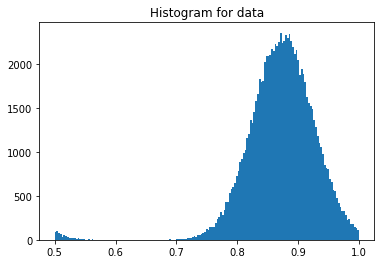

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0027473923', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0028282800', '26.9452762604', '0.0032104482', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-2.1661906242', '1.1371164322', '-0.7024688721', '0.4723303020', '-0.3373517394', '0.2512594461', '-0.2011227906', '0.1586172581']
rms error: ['4.5650711060', '2.7231552601', '1.9169410467', '1.4495085478', '1.1548079252', '0.9399074912', '0.8231379390', '0.7043945193']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.8347922285

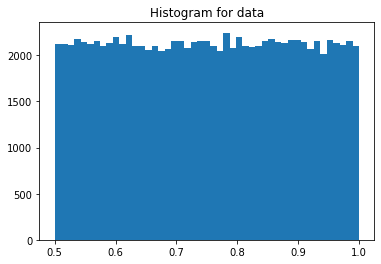

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-2.4302587509', '1.3890748024', '-0.9400948882', '0.6908121705', '-0.5350394249', '0.4287904203', '-0.3670843244', '0.3062494397']
rms error: ['8.4216060638', '5.1481332779', '3.7074701786', '2.8448641300', '2.2959885597', '1.8791164160', '1.6611779928', '1.4355212450']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571

In [4]:
intwidth = 7
fracwidth = 8
point_search(func="div", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="exp", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="log", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

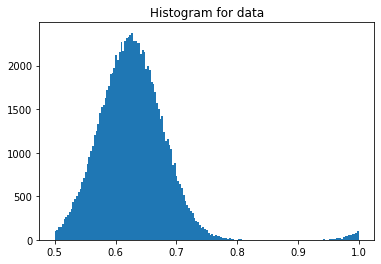

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0000610314', '-1.0000000000', '-0.0000622713', '-1.0000000000', '-0.0000676846', '-0.0000684646']
max error: ['0.0000000000', '1.0000000000', '0.0000605404', '1.0000000000', '0.0000658974', '1.0000000000', '0.0246278383']
avg error: ['-0.0784219205', '0.0289542377', '-0.0136330687', '0.0084367190', '-0.0064906101', '0.0056691235', '0.0002024089']
rms error: ['0.1167624965', '0.0805597380', '0.0725682527', '0.0696332976', '0.0676793978', '0.0660083666', '0.0011131088']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3601074219', '-0.0080566406', '-0.1296386719', '-0.0003707483', '-0.0466308594', '-0.0000903499', 

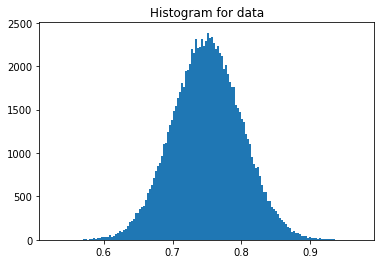

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-0.8871653080', '0.0001660445', '-0.7871311903', '-0.0000444900', '-0.6982383132', '-0.0000649608', '-0.0000684646']
max error: ['-0.0033197543', '0.8356972337', '0.0000369408', '0.7413522601', '0.0000600074', '0.6576744318', '0.0246659871']
avg error: ['-0.2601148784', '0.1401459426', '-0.0779534355', '0.0446429625', '-0.0262688622', '0.0158470571', '0.0030304748']
rms error: ['0.2792007625', '0.1620753706', '0.0989561602', '0.0631678626', '0.0419689156', '0.0289163720', '0.0044343360']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3063984811', '-0.0035779616', '-0.0937667117', '-0.0000921629', '-0.0288156457', '-0.0000903499', '-

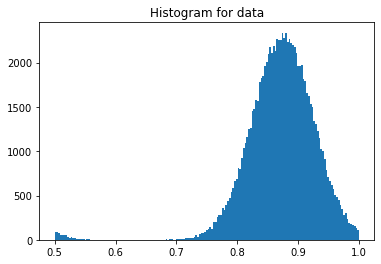

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0000610314', '-1.0000000000', '-0.0000619713', '-1.0000000000', '-0.0000619713', '-0.0000619713']
max error: ['0.0000000000', '1.0000000000', '0.0000605404', '1.0000000000', '0.0000657988', '1.0000000000', '0.0247004405']
avg error: ['-0.5658536553', '0.4375159144', '-0.3433642983', '0.2732597291', '-0.2203401178', '0.1798806638', '0.0156588908']
rms error: ['0.5859708786', '0.4694085717', '0.3854377866', '0.3234573305', '0.2767007649', '0.2407325655', '0.0169263575']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3601074219', '-0.0080566406', '-0.1296386719', '-0.0003707483', '-0.0466308594', '-0.0000903499', 

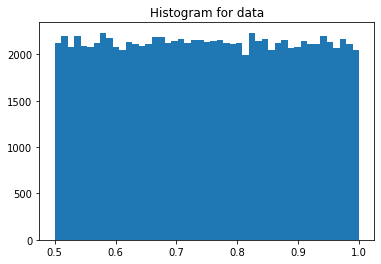

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0000610314', '-1.0000000000', '-0.0000622713', '-1.0000000000', '-0.0000676846', '-0.0000684646']
max error: ['0.0000000000', '1.0000000000', '0.0000605404', '1.0000000000', '0.0000658974', '1.0000000000', '0.0247004405']
avg error: ['-0.3320979476', '0.2487732023', '-0.1988358200', '0.1655752957', '-0.1418298781', '0.1240301728', '0.0069209756']
rms error: ['0.4459089935', '0.3766044080', '0.3319519460', '0.3001054525', '0.2759066522', '0.2567192614', '0.0110507160']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3601074219', '-0.0080566406', '-0.1296386719', '-0.0003707483', '-0.0466308594', '-0.0000903499', '-0.

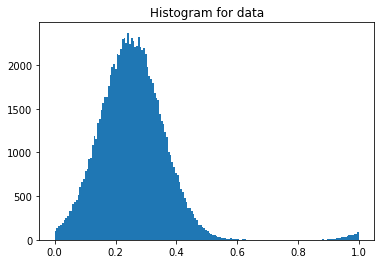

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189885646', '-0.0037317590', '-0.0006980468', '-0.0001845153', '-0.0001474072']
max error: ['0.0000000000', '0.0001156898', '0.0001169692', '0.0001172547', '0.0001202282', '0.0001216245', '0.0002152838']
avg error: ['-0.0310294628', '-0.0034594717', '-0.0003529569', '-0.0000394073', '-0.0000055731', '-0.0000008618', '-0.0000003680']
rms error: ['0.0404644832', '0.0072135315', '0.0014137620', '0.0002606604', '0.0000713603', '0.0000582939', '0.0000582716']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333']
min error: ['-0.1734388173', '-0.0406034403', '-0.0073721418', '-0.0012090983', '-0.0003382648', '-0.0003382648']
max error: ['0.0000119706', '0.003173828

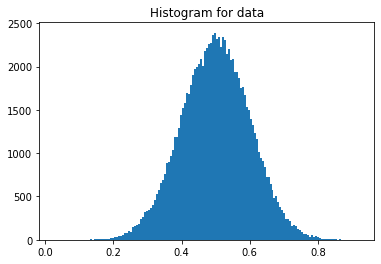

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333']
min error: ['-0.2350833863', '-0.0662903041', '-0.0144661563', '-0.0026039688', '-0.0003746265', '-0.0001613078']
max error: ['-0.0003801581', '0.0000947207', '0.0000947207', '0.0001099403', '0.0001202282', '0.0001410814']
avg error: ['-0.0917893723', '-0.0155267352', '-0.0020585721', '-0.0002265294', '-0.0000247287', '-0.0000014934']
rms error: ['0.0965527296', '0.0173675362', '0.0024974053', '0.0003057189', '0.0000614919', '0.0000510464']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333']
min error: ['-0.1457280666', '-0.0308009703', '-0.0050347447', '-0.0006806461', '-0.0003163984', '-0.0003163984']
max error: ['0.0000119706', '0.0019942359', '0.0001397852', '0.0001397852', '0.0001397852', '0.0001397852']
avg error: ['-0

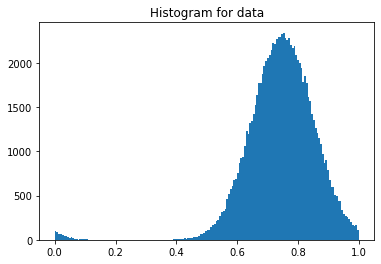

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189885646', '-0.0037317590', '-0.0006980468', '-0.0001860919', '-0.0001613078']
max error: ['0.0000000000', '0.0001156898', '0.0001156898', '0.0001156898', '0.0001156898', '0.0001410814', '0.0002152838']
avg error: ['-0.1722544432', '-0.0410739817', '-0.0076420056', '-0.0011626264', '-0.0001586824', '-0.0000090640', '0.0000030350']
rms error: ['0.1761513799', '0.0431644730', '0.0083431462', '0.0013315508', '0.0001964004', '0.0000546609', '0.0000531665']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333']
min error: ['-0.1734388173', '-0.0406034403', '-0.0073721418', '-0.0012090983', '-0.0003348951', '-0.0003239640']
max error: ['-0.0014624371', '0.003173828

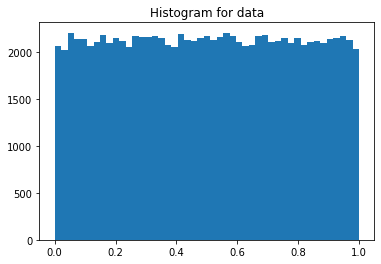

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189885646', '-0.0037317590', '-0.0006980468', '-0.0001860919', '-0.0001613078']
max error: ['0.0000000000', '0.0001156898', '0.0001169692', '0.0001172547', '0.0001202282', '0.0001410814', '0.0002152838']
avg error: ['-0.1035836339', '-0.0232985839', '-0.0043278961', '-0.0006811285', '-0.0000981511', '-0.0000074458', '0.0000032410']
rms error: ['0.1318952888', '0.0333435312', '0.0068456824', '0.0011726259', '0.0001868911', '0.0000576528', '0.0000570478']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333']
min error: ['-0.1734388173', '-0.0406034403', '-0.0073721418', '-0.0012090983', '-0.0003382648', '-0.0003382648']
max error: ['0.0000119706', '0.0031738281',

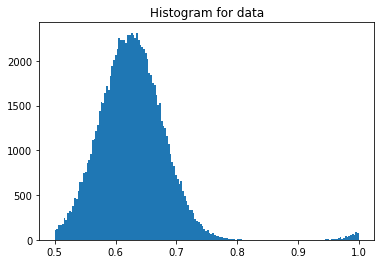

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-1255.8468017578', '-0.0001736297', '-572.9301757812', '-0.0002017252', '-367.9552001953', '-0.0002484385', '-270.9670410156', '-0.0003518031']
max error: ['-0.0000460914', '789.9034423828', '0.0001806778', '448.9450683594', '0.0002198722', '311.9617919922', '0.0002837222', '238.9707031250']
avg error: ['-0.4259703755', '0.2356162667', '-0.1622343957', '0.1240141168', '-0.1003017128', '0.0840953514', '-0.0723208636', '0.0632563233']
rms error: ['10.9223823547', '6.8611874580', '4.9704270363', '3.8898289204', '3.1862242222', '2.6969685555', '2.3393771648', '2.0608370304']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.

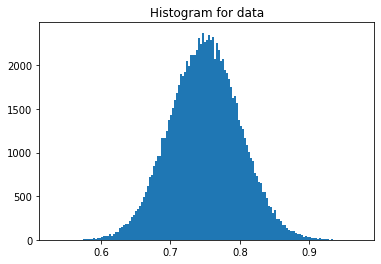

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-9.5273008347', '0.0000364232', '-3.8814094067', '-0.0001918335', '-2.2193789482', '-0.0002484385', '-1.4510031939', '-0.0003518031']
max error: ['-0.0034602077', '5.6648249626', '0.0001069150', '2.8669350147', '0.0002198722', '1.7728346586', '0.0002837222', '1.2132565975']
avg error: ['-0.3847075403', '0.1380618960', '-0.0584106036', '0.0273018163', '-0.0137215899', '0.0073109735', '-0.0040800073', '0.0023629377']
rms error: ['0.4616072774', '0.1861784607', '0.0905047804', '0.0495781228', '0.0296975356', '0.0190776996', '0.0129737807', '0.0092680976']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 5.3

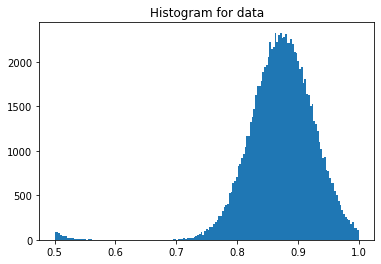

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-1255.8468017578', '-0.0001736297', '-572.9301757812', '-0.0002017252', '-367.9552001953', '-0.0002167718', '-270.9670410156', '-0.0002844850']
max error: ['-0.0000460914', '789.9034423828', '0.0001806778', '448.9450683594', '0.0002047146', '311.9617919922', '0.0002347310', '238.9707031250']
avg error: ['-2.5218250751', '1.3695976734', '-0.8691032529', '0.6032849550', '-0.4445134699', '0.3420510590', '-0.2721696198', '0.2223602682']
rms error: ['15.1665964127', '9.4995069504', '6.8669958115', '5.3654665947', '4.3888945580', '3.7122395039', '3.2177157402', '2.8330543041']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.

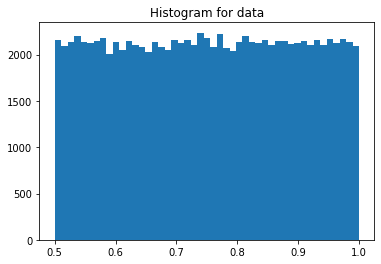

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-1255.8468017578', '-0.0001736297', '-572.9301757812', '-0.0002017252', '-367.9552001953', '-0.0002484385', '-270.9670410156', '-0.0003518031']
max error: ['-0.0000460914', '789.9034423828', '0.0001806778', '448.9450683594', '0.0002198722', '311.9617919922', '0.0002837222', '238.9707031250']
avg error: ['-3.9951879978', '2.3850884438', '-1.6595681906', '1.2554665804', '-0.9998826385', '0.8256308436', '-0.6998329759', '0.6045641899']
rms error: ['34.1993942261', '21.4818897247', '15.5616912842', '12.1789674759', '9.9734735489', '8.4455213547', '7.3265914917', '6.4551601410']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3

In [5]:
intwidth = 7
fracwidth = 12
point_search(func="div", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="exp", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="log", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

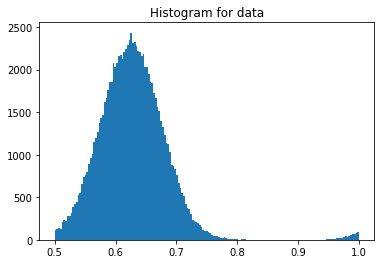

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-0.9997558594', '-0.0000037116', '-0.9995117188', '-0.0000039488', '-0.9992676377', '-0.0000041695', '-0.0000042879']
max error: ['0.0000000000', '0.9996337891', '0.0000038395', '0.9993897080', '0.0000040838', '0.9991455674', '0.0245487466']
avg error: ['-0.0784129873', '0.0288876332', '-0.0135771893', '0.0083924178', '-0.0064596948', '0.0056460849', '0.0002016727']
rms error: ['0.1165211946', '0.0803722963', '0.0724065378', '0.0694594160', '0.0674814433', '0.0657813475', '0.0011107682']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3598870933', '-0.0080032349', '-0.1295239478', '-0.0003206516', '-0.0466127545', '-0.0000162885', 

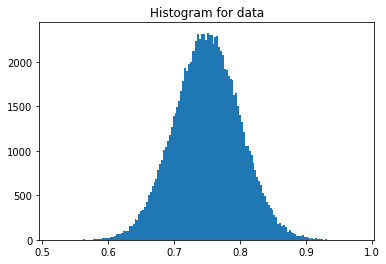

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-0.9244568944', '0.0000542306', '-0.8546154499', '-0.0000018515', '-0.7900566459', '-0.0000033705', '-0.0000033705']
max error: ['-0.0014021436', '0.8888468742', '-0.0000011749', '0.8217140436', '0.0000030913', '0.7596244812', '0.0245465692']
avg error: ['-0.2603249252', '0.1401916891', '-0.0779040009', '0.0445567481', '-0.0261742324', '0.0157645643', '0.0030219457']
rms error: ['0.2791129053', '0.1617845595', '0.0985939577', '0.0628227443', '0.0416795351', '0.0286951847', '0.0044073425']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3239730597', '-0.0049164379', '-0.1049609333', '-0.0001436463', '-0.0340120718', '-0.0000053821', '

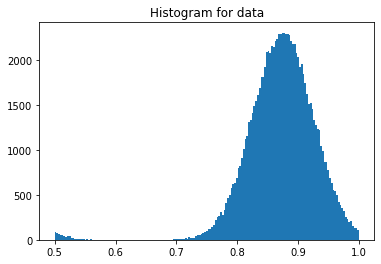

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0000032293', '-1.0000000000', '-0.0000039218', '-1.0000000000', '-0.0000040018', '-0.0000040018']
max error: ['0.0000000000', '1.0000000000', '0.0000038276', '1.0000000000', '0.0000039316', '1.0000000000', '0.0245539937']
avg error: ['-0.5663018823', '0.4379563034', '-0.3437839448', '0.2736629546', '-0.2207276672', '0.1802449524', '0.0156700239']
rms error: ['0.5863308907', '0.4698166251', '0.3858821690', '0.3239293098', '0.2771855891', '0.2412051708', '0.0169324968']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3600006104', '-0.0079958495', '-0.1296081543', '-0.0003207406', '-0.0466613770', '-0.0000159271', 

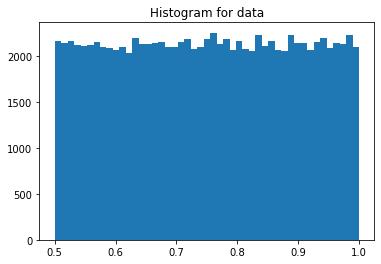

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0000038221', '-1.0000000000', '-0.0000039488', '-1.0000000000', '-0.0000041695', '-0.0000042879']
max error: ['0.0000000000', '1.0000000000', '0.0000038395', '1.0000000000', '0.0000040838', '1.0000000000', '0.0245539937']
avg error: ['-0.3342088163', '0.2508090436', '-0.2007391751', '0.1673508584', '-0.1434973329', '0.1256026030', '0.0069613596']
rms error: ['0.4480392039', '0.3788103759', '0.3341856003', '0.3023532629', '0.2781687975', '0.2589863837', '0.0110845296']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3600006104', '-0.0079960935', '-0.1296081543', '-0.0003208198', '-0.0466613770', '-0.0000164088', '-0.

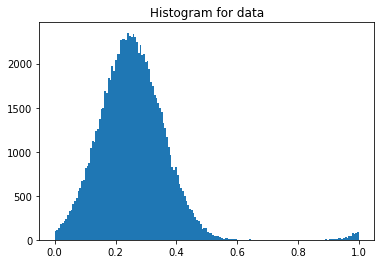

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642186284', '-0.0802901313', '-0.0189881176', '-0.0036572146', '-0.0005996561', '-0.0000943206', '-0.0000213670', '-0.0000100901']
max error: ['0.0000000000', '0.0000074595', '0.0000075229', '0.0000076693', '0.0000076693', '0.0000076693', '0.0000078071', '0.0000130747']
avg error: ['-0.0309741739', '-0.0034403862', '-0.0003506471', '-0.0000366866', '-0.0000041263', '-0.0000004689', '-0.0000000505', '0.0000000122']
rms error: ['0.0402543806', '0.0071017011', '0.0013862873', '0.0002511408', '0.0000397152', '0.0000064726', '0.0000036287', '0.0000035842']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.1733378321', '-0.0404943451', '-0.0072875

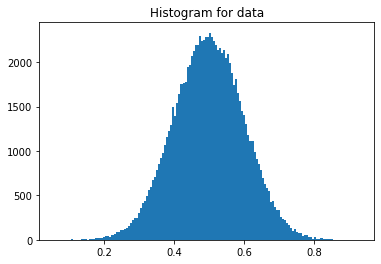

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2382455766', '-0.0677685514', '-0.0149553735', '-0.0026829075', '-0.0004055426', '-0.0000500809', '-0.0000113818', '-0.0000093014']
max error: ['-0.0016653702', '-0.0000261878', '0.0000034843', '0.0000056912', '0.0000075015', '0.0000075401', '0.0000081367', '0.0000093555']
avg error: ['-0.0915717930', '-0.0154684857', '-0.0020579584', '-0.0002273838', '-0.0000217224', '-0.0000018394', '-0.0000001574', '-0.0000000159']
rms error: ['0.0963310674', '0.0173041169', '0.0024943904', '0.0003033168', '0.0000324216', '0.0000043601', '0.0000031269', '0.0000031101']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333']
min error: ['-0.1486330777', '-0.0316741243', '-0.0051771640', '-0.00068

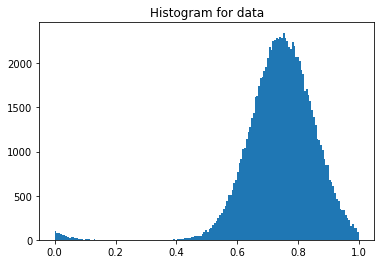

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642243207', '-0.0802930221', '-0.0189863350', '-0.0036554520', '-0.0006052495', '-0.0000942429', '-0.0000212354', '-0.0000119848']
max error: ['0.0000000000', '0.0000075995', '0.0000075995', '0.0000076693', '0.0000076693', '0.0000076693', '0.0000084938', '0.0000152157']
avg error: ['-0.1721203327', '-0.0410289802', '-0.0076460196', '-0.0011715151', '-0.0001532219', '-0.0000174214', '-0.0000017328', '0.0000003677']
rms error: ['0.1760341823', '0.0431155600', '0.0083430735', '0.0013391272', '0.0001847908', '0.0000225209', '0.0000039854', '0.0000032618']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.1733392924', '-0.0405034609', '-0.0072874

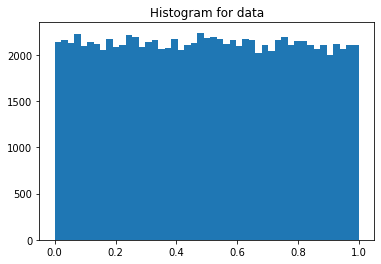

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642354667', '-0.0802985579', '-0.0189881250', '-0.0036635383', '-0.0006052495', '-0.0000943206', '-0.0000213670', '-0.0000115553']
max error: ['0.0000000000', '0.0000075998', '0.0000076965', '0.0000076965', '0.0000076965', '0.0000076965', '0.0000084938', '0.0000152157']
avg error: ['-0.1031081304', '-0.0231661070', '-0.0043081823', '-0.0006810672', '-0.0000937547', '-0.0000113487', '-0.0000012141', '0.0000002364']
rms error: ['0.1314810663', '0.0332176797', '0.0068279817', '0.0011764349', '0.0001745143', '0.0000228487', '0.0000042922', '0.0000035150']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.1733532250', '-0.0405011810', '-0.007291320

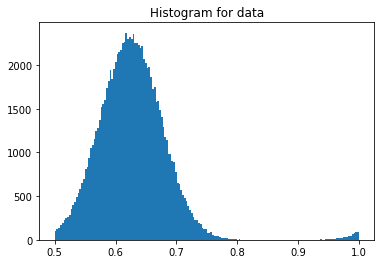

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-20108.8457031250', '-0.0000105343', '-9185.9296875000', '-0.0000118989', '-5908.9550781250', '-0.0000140775', '-4348.9667968750', '-0.0000170198']
max error: ['-0.0000020642', '12656.9033203125', '0.0000113167', '7195.9453125000', '0.0000128641', '5010.9619140625', '0.0000158613', '3840.9707031250']
avg error: ['-0.7903363705', '0.4648675621', '-0.3284949660', '0.2540886402', '-0.2070574909', '0.1745623052', '-0.1507330537', '0.1324997991']
rms error: ['66.7051086426', '41.9827575684', '30.4676189423', '23.8657417297', '19.5961971283', '16.6170139313', '14.4208402634', '12.7355680466']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962

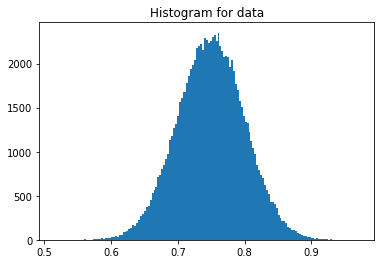

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-9.5828247070', '0.0000253659', '-3.9048511982', '-0.0000078887', '-2.2354147434', '-0.0000131571', '-1.4628868103', '-0.0000170198']
max error: ['-0.0007115046', '5.6997880936', '0.0000023387', '2.8857300282', '0.0000100101', '1.7872924805', '0.0000145844', '1.2183929682']
avg error: ['-0.3840821087', '0.1377567202', '-0.0581772700', '0.0271612499', '-0.0136202527', '0.0072201267', '-0.0040066503', '0.0023122565']
rms error: ['0.4594522417', '0.1847548187', '0.0894504339', '0.0488476157', '0.0291816238', '0.0187334884', '0.0127653787', '0.0091422759']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 5.3

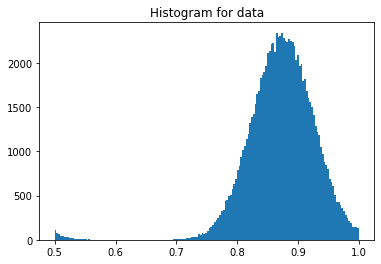

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-10053.8466796875', '-0.0000107640', '-4592.4296875000', '-0.0000117874', '-2953.9548339844', '-0.0000127476', '-2173.9667968750', '-0.0000127476']
max error: ['-0.0000020642', '6327.9033203125', '0.0000112147', '3597.4450683594', '0.0000126373', '2504.9616699219', '0.0000126373', '1919.9707031250']
avg error: ['-3.1541168690', '1.7676980495', '-1.1579564810', '0.8294448256', '-0.6302043796', '0.4994926453', '-0.4087396860', '0.3429306149']
rms error: ['69.6600418091', '43.8336601257', '31.8056259155', '24.9103946686', '20.4525489807', '17.3405151367', '15.0472850800', '13.2876405716']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.79620

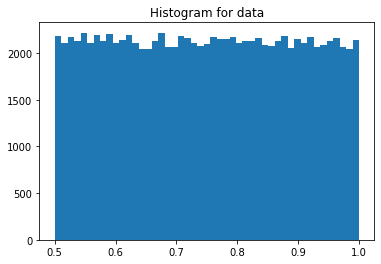

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-20108.8457031250', '-0.0000109764', '-9185.9296875000', '-0.0000118989', '-5908.9550781250', '-0.0000140775', '-4348.9667968750', '-0.0000170198']
max error: ['-0.0000020638', '12656.9033203125', '0.0000113167', '7195.9453125000', '0.0000128641', '5010.9619140625', '0.0000158613', '3840.9707031250']
avg error: ['-6.7488512993', '4.1197376251', '-2.9192068577', '2.2422327995', '-1.8108803034', '1.5135332346', '-1.2968025208', '1.1321823597']
rms error: ['204.9214324951', '128.9738922119', '93.5992584229', '73.3183441162', '60.2028503418', '51.0504493713', '44.3038635254', '39.1268005371']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962

In [6]:
intwidth = 7
fracwidth = 16
point_search(func="div", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="exp", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)
point_search(func="log", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)